## EDA - Dataset 06 - latest_covid-19_india_statewise_data

### 1. Packages & Settings


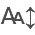

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Advanced analysis
from scipy import stats
from ydata_profiling import ProfileReport

# Interactive tables (optional)
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# Configuration
pd.set_option('display.max_columns', 30)
sns.set_theme(style='whitegrid')
%config InlineBackend.figure_format = 'retina'
np.random.seed(42)  # Reproducibility

### 2. Importing Data

In [2]:
# Data Loading
df = pd.read_csv(r"E:\Work\DataSciencePortfolio\0_Data\0.1_Raw\DATA.csv")

### 3.1 First Look

In [3]:
# Sample data
show(df.sample(5))  # Random rows to avoid bias

# Summary of the DataFrame
df.info()

# Basic Statistics of the DataFrame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

### 3.2 Results of First Look:
##### Observations:
- medium sized dataframe (18249 x 14)
- There are no missing values, which is good. No cleaning of null/faulty values necessary.
- Data types outside of "Date" look good, no correction of data types necessary.
##### Potential Problems:
- "unnamed 0" seems like a potentially irrelevant column, at least it's not a key, and the meaning of it isn't clear.
- "Date" is in text/string format, but correctly in YYYY-MM-DD, which makes transforming the column easy.
- There seems to be extremely high standard deviations / abnormalities in "Total Volume" "4046" "4225" "4770" "Total Bags" "Small Bags" "Large Bags" "XLarge Bags"
- These abnormalities do not exist in Average Price, Year, or Unnamed column, which leads to it being tied to a "volume"/"amount" problem. To be observed.

### 4.1 Automated Analysis with ydata_profiling

In [ ]:
profile = ProfileReport(df, title="Automated EDA", explorative=True)
profile.to_notebook_iframe()
# Save to HTML for later review (optional)
# profile.to_file("5.1.06b_automated_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 888.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.2 Automated EDA Results
##### Observations
- As shown in 3.2 confirmed, there are abnormal values tied to volumes, with extreme outliers. **(Abnormality)**
- There is a negative correlation between average price and purchase volumes, which makes sense.

##### Hypotheses:
- Unnamed column might just be grouping the data in indexes when the data was gathered. **Check with "Date"**.
- Taking a closer look at regions, there are regions such as "east" "west", which might be grouping values of other regions, creating large volumes. **Try to fix**
- There is a correlation between which type (organic or not) of avocado gets bought and average price, probably organic = more expensive. **Investigate this**
- There seems to be a higher correlation between the medium and large avocados. There also seems a larger correlation for smaller bags, maybe they're preferred.
- XLarge bags and the largest avocado (4770) seem to be less desirable than the smaller options, with large % of zero values. Check if this is seasonal/regional.

### 5. Necessary Cleaning & Transformation Steps for Python Scripts
##### Cleaning:
- Fix "Date" Data type.
- Remove "Unnamed 0" column.
##### Transformation:
- Remove "totals" or combinations of regions, possibly complicated, need to find out which regions to remove.

### 5. Hypothesis-Driven Analysis

In [5]:
# Check hypotheses in 4.2

### 6. Focused Investigation
*When to use*:  
- Drill into subgroups (e.g., "Why do users aged 30-40 have higher churn?")  
- Export specific slices for stakeholder reviews  
*Industry Standard*: Never explore blindly – start with hypotheses from Sections 4-5.

In [6]:
# Check how hyptheses from 3-5 can be explained by the data
"""
show(
    df.query("Income > 70000"),
    column_filters="footer",
    buttons=["copy", "csv"],
    scrollY="300px",
    classes="compact"
)
"""

'\nshow(\n    df.query("Income > 70000"),\n    column_filters="footer",\n    buttons=["copy", "csv"],\n    scrollY="300px",\n    classes="compact"\n)\n'